# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [38]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [39]:
train, test = keras.datasets.cifar10.load_data()

In [40]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [41]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [42]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [43]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4]
EPOCHS = 50

In [44]:
def set_optimizer(optimizer):
    OPTIMIZERS = {"SGD":keras.optimizers.SGD(lr=lr),
                  "RMSprop":keras.optimizers.RMSprop(lr=lr),
                  "AdaGrad":keras.optimizers.Adagrad(lr=lr),
                  "Adam":keras.optimizers.Adam(lr=lr)}
    return OPTIMIZERS.get(optimizer)

In [45]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    optimizer_names = ["SGD","RMSprop","AdaGrad","Adam"]
    for optimizer_name in optimizer_names:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with lr = %f , optimizer=%s" % (lr,optimizer_name))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #optimizer = keras.optimizers.SGD(lr=lr)
        optimizer = set_optimizer(optimizer_name)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=False)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "lr: %f optimizer: %s" % (lr,optimizer_name)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with lr = 0.100000 , optimizer=SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 3s 15ms/st

196/196 [==============================] - 4s 18ms/step - loss: 0.7149 - accuracy: 0.7464 - val_loss: 1.7600 - val_accuracy: 0.4979
Experiment with lr = 0.100000 , optimizer=RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable para

196/196 [==============================] - 5s 27ms/step - loss: 2.3077 - accuracy: 0.0993 - val_loss: 2.3134 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 25ms/step - loss: 2.3077 - accuracy: 0.0993 - val_loss: 2.3134 - val_accuracy: 0.1000
Experiment with lr = 0.100000 , optimizer=AdaGrad
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________________________________________________________

196/196 [==============================] - 3s 17ms/step - loss: 0.8516 - accuracy: 0.6957 - val_loss: 1.8433 - val_accuracy: 0.4706
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8410 - accuracy: 0.7019 - val_loss: 1.8089 - val_accuracy: 0.4741
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8178 - accuracy: 0.7097 - val_loss: 1.8454 - val_accuracy: 0.4832
Experiment with lr = 0.100000 , optimizer=Adam
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

196/196 [==============================] - 4s 19ms/step - loss: 2.3077 - accuracy: 0.0987 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 2.3077 - accuracy: 0.0987 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 3s 18ms/step - loss: 2.3077 - accuracy: 0.0987 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 2.3077 - accuracy: 0.0987 - val_loss: 2.3077 - val_accuracy: 0.1000
Experiment with lr = 0.010000 , optimizer=SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________

196/196 [==============================] - 3s 15ms/step - loss: 1.2481 - accuracy: 0.5621 - val_loss: 1.3827 - val_accuracy: 0.5047
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2409 - accuracy: 0.5640 - val_loss: 1.3779 - val_accuracy: 0.5066
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2352 - accuracy: 0.5667 - val_loss: 1.3816 - val_accuracy: 0.5060
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2282 - accuracy: 0.5692 - val_loss: 1.3900 - val_accuracy: 0.5076
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2216 - accuracy: 0.5720 - val_loss: 1.3809 - val_accuracy: 0.5070
Experiment with lr = 0.010000 , optimizer=RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
______________________

196/196 [==============================] - 5s 24ms/step - loss: 1.7097 - accuracy: 0.3874 - val_loss: 1.8167 - val_accuracy: 0.3532
Epoch 46/50
196/196 [==============================] - 5s 25ms/step - loss: 1.7064 - accuracy: 0.3878 - val_loss: 1.7649 - val_accuracy: 0.3738
Epoch 47/50
196/196 [==============================] - 5s 25ms/step - loss: 1.7103 - accuracy: 0.3892 - val_loss: 1.8424 - val_accuracy: 0.3610
Epoch 48/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7056 - accuracy: 0.3938 - val_loss: 1.7640 - val_accuracy: 0.3684
Epoch 49/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7023 - accuracy: 0.3882 - val_loss: 1.7587 - val_accuracy: 0.3751
Epoch 50/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7014 - accuracy: 0.3885 - val_loss: 1.7750 - val_accuracy: 0.3848
Experiment with lr = 0.010000 , optimizer=AdaGrad
Model: "functional_1"
_________________________________________________________________
Layer (typ

196/196 [==============================] - 3s 17ms/step - loss: 1.0731 - accuracy: 0.6308 - val_loss: 1.3130 - val_accuracy: 0.5374
Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0584 - accuracy: 0.6347 - val_loss: 1.3833 - val_accuracy: 0.5131
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0533 - accuracy: 0.6378 - val_loss: 1.3195 - val_accuracy: 0.5353
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0431 - accuracy: 0.6406 - val_loss: 1.3334 - val_accuracy: 0.5285
Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0355 - accuracy: 0.6430 - val_loss: 1.3152 - val_accuracy: 0.5361
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0278 - accuracy: 0.6464 - val_loss: 1.3144 - val_accuracy: 0.5380
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0115 - accuracy: 0.6521 - val_loss: 1.3787 - val_accuracy: 0.5204
Expe

196/196 [==============================] - 3s 17ms/step - loss: 1.5083 - accuracy: 0.4564 - val_loss: 1.6053 - val_accuracy: 0.4335
Epoch 44/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5046 - accuracy: 0.4573 - val_loss: 1.6129 - val_accuracy: 0.4288
Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5047 - accuracy: 0.4597 - val_loss: 1.6161 - val_accuracy: 0.4248
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 1.4838 - accuracy: 0.4639 - val_loss: 1.6343 - val_accuracy: 0.4226
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5043 - accuracy: 0.4589 - val_loss: 1.6015 - val_accuracy: 0.4327
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5003 - accuracy: 0.4598 - val_loss: 1.6404 - val_accuracy: 0.4194
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.4962 - accuracy: 0.4607 - val_loss: 1.6521 - val_accuracy: 0.4112
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 1.7162 - accuracy: 0.4027 - val_loss: 1.7194 - val_accuracy: 0.4042
Epoch 43/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7124 - accuracy: 0.4041 - val_loss: 1.7158 - val_accuracy: 0.4051
Epoch 44/50
196/196 [==============================] - 3s 15ms/step - loss: 1.7087 - accuracy: 0.4058 - val_loss: 1.7123 - val_accuracy: 0.4054
Epoch 45/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7051 - accuracy: 0.4070 - val_loss: 1.7088 - val_accuracy: 0.4060
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7015 - accuracy: 0.4080 - val_loss: 1.7054 - val_accuracy: 0.4072
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6980 - accuracy: 0.4091 - val_loss: 1.7021 - val_accuracy: 0.4084
Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 1.6946 - accuracy: 0.4103 - val_loss: 1.6988 - val_accuracy: 0.4085
Epoc

196/196 [==============================] - 5s 24ms/step - loss: 0.8513 - accuracy: 0.6951 - val_loss: 2.2858 - val_accuracy: 0.4550
Epoch 42/50
196/196 [==============================] - 5s 24ms/step - loss: 0.8441 - accuracy: 0.6988 - val_loss: 2.1923 - val_accuracy: 0.4700
Epoch 43/50
196/196 [==============================] - 5s 25ms/step - loss: 0.8333 - accuracy: 0.7028 - val_loss: 2.0996 - val_accuracy: 0.4671
Epoch 44/50
196/196 [==============================] - 5s 24ms/step - loss: 0.8183 - accuracy: 0.7084 - val_loss: 2.0850 - val_accuracy: 0.4828
Epoch 45/50
196/196 [==============================] - 5s 25ms/step - loss: 0.8089 - accuracy: 0.7102 - val_loss: 2.0490 - val_accuracy: 0.4805
Epoch 46/50
196/196 [==============================] - 5s 25ms/step - loss: 0.7981 - accuracy: 0.7140 - val_loss: 2.1861 - val_accuracy: 0.4755
Epoch 47/50
196/196 [==============================] - 5s 26ms/step - loss: 0.7921 - accuracy: 0.7155 - val_loss: 2.4080 - val_accuracy: 0.4681
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 1.5610 - accuracy: 0.4594 - val_loss: 1.5793 - val_accuracy: 0.4472
Epoch 41/50
196/196 [==============================] - 3s 16ms/step - loss: 1.5567 - accuracy: 0.4605 - val_loss: 1.5756 - val_accuracy: 0.4479
Epoch 42/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5523 - accuracy: 0.4618 - val_loss: 1.5719 - val_accuracy: 0.4489
Epoch 43/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5482 - accuracy: 0.4632 - val_loss: 1.5684 - val_accuracy: 0.4497
Epoch 44/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5441 - accuracy: 0.4645 - val_loss: 1.5651 - val_accuracy: 0.4504
Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5401 - accuracy: 0.4658 - val_loss: 1.5621 - val_accuracy: 0.4511
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5361 - accuracy: 0.4671 - val_loss: 1.5587 - val_accuracy: 0.4520
Epoc

196/196 [==============================] - 3s 17ms/step - loss: 0.9418 - accuracy: 0.6614 - val_loss: 1.7032 - val_accuracy: 0.4796
Epoch 40/50
196/196 [==============================] - 3s 18ms/step - loss: 0.9279 - accuracy: 0.6673 - val_loss: 1.6980 - val_accuracy: 0.4784
Epoch 41/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9307 - accuracy: 0.6625 - val_loss: 1.7098 - val_accuracy: 0.4839
Epoch 42/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9316 - accuracy: 0.6643 - val_loss: 1.7051 - val_accuracy: 0.4870
Epoch 43/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9290 - accuracy: 0.6637 - val_loss: 1.6428 - val_accuracy: 0.4966
Epoch 44/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9231 - accuracy: 0.6661 - val_loss: 1.6661 - val_accuracy: 0.4920
Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9210 - accuracy: 0.6665 - val_loss: 1.6708 - val_accuracy: 0.4879
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 2.0786 - accuracy: 0.2653 - val_loss: 2.0780 - val_accuracy: 0.2615
Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0746 - accuracy: 0.2667 - val_loss: 2.0741 - val_accuracy: 0.2631
Epoch 40/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0707 - accuracy: 0.2682 - val_loss: 2.0702 - val_accuracy: 0.2653
Epoch 41/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0668 - accuracy: 0.2701 - val_loss: 2.0664 - val_accuracy: 0.2676
Epoch 42/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0630 - accuracy: 0.2718 - val_loss: 2.0627 - val_accuracy: 0.2697
Epoch 43/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0592 - accuracy: 0.2735 - val_loss: 2.0591 - val_accuracy: 0.2699
Epoch 44/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0556 - accuracy: 0.2751 - val_loss: 2.0555 - val_accuracy: 0.2708
Epoc

196/196 [==============================] - 5s 26ms/step - loss: 1.0649 - accuracy: 0.6326 - val_loss: 1.3867 - val_accuracy: 0.5147
Epoch 38/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0530 - accuracy: 0.6370 - val_loss: 1.3689 - val_accuracy: 0.5185
Epoch 39/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0420 - accuracy: 0.6425 - val_loss: 1.5626 - val_accuracy: 0.4805
Epoch 40/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0337 - accuracy: 0.6444 - val_loss: 1.3562 - val_accuracy: 0.5262
Epoch 41/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0213 - accuracy: 0.6490 - val_loss: 1.4055 - val_accuracy: 0.5176
Epoch 42/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0120 - accuracy: 0.6523 - val_loss: 1.3974 - val_accuracy: 0.5217
Epoch 43/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0001 - accuracy: 0.6575 - val_loss: 1.4022 - val_accuracy: 0.5164
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 1.9283 - accuracy: 0.3338 - val_loss: 1.9279 - val_accuracy: 0.3372
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9244 - accuracy: 0.3354 - val_loss: 1.9240 - val_accuracy: 0.3381
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9206 - accuracy: 0.3372 - val_loss: 1.9203 - val_accuracy: 0.3393
Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9170 - accuracy: 0.3387 - val_loss: 1.9167 - val_accuracy: 0.3401
Epoch 40/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9134 - accuracy: 0.3399 - val_loss: 1.9132 - val_accuracy: 0.3413
Epoch 41/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9100 - accuracy: 0.3412 - val_loss: 1.9099 - val_accuracy: 0.3417
Epoch 42/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9067 - accuracy: 0.3423 - val_loss: 1.9066 - val_accuracy: 0.3429
Epoc

196/196 [==============================] - 3s 17ms/step - loss: 0.9788 - accuracy: 0.6642 - val_loss: 1.3674 - val_accuracy: 0.5237
Epoch 36/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9670 - accuracy: 0.6682 - val_loss: 1.3689 - val_accuracy: 0.5259
Epoch 37/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9544 - accuracy: 0.6721 - val_loss: 1.3716 - val_accuracy: 0.5249
Epoch 38/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9429 - accuracy: 0.6772 - val_loss: 1.3745 - val_accuracy: 0.5255
Epoch 39/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9310 - accuracy: 0.6824 - val_loss: 1.3769 - val_accuracy: 0.5262
Epoch 40/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9197 - accuracy: 0.6867 - val_loss: 1.3787 - val_accuracy: 0.5260
Epoch 41/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9072 - accuracy: 0.6907 - val_loss: 1.3825 - val_accuracy: 0.5262
Epoc

IndexError: list index out of range

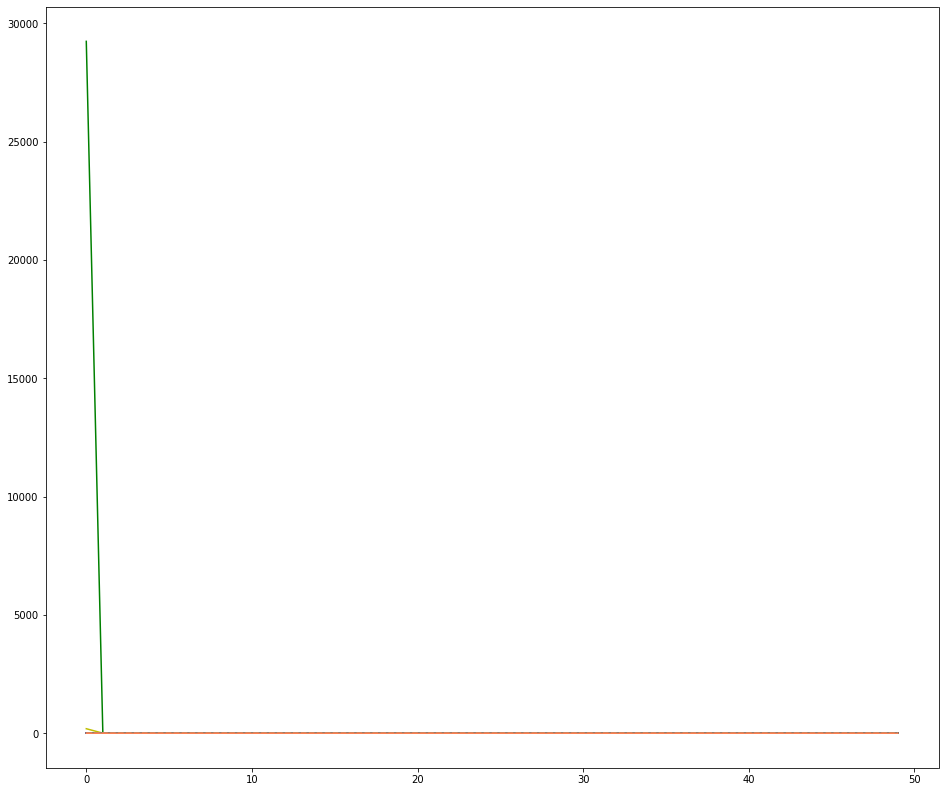

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()